In [1]:
using Plots

In [2]:
dot(p1, p2) = sum(p1 .* p2)
cosangle(p1, p2) = dot(p1, p2)/sqrt(dot(p1,p1)*dot(p2,p2))

# find all rectangles for some given points
function allrects(plist::Vector{Tuple{T, T}}) where{T}
    length(plist) < 4 && return []
    plist_sorted = sort(plist)
    p1, ps = plist_sorted[1], plist_sorted[2:end]
    rects = []
    for i in 1:length(ps)
        p2 = ps[i]
        for p3 in ps[i+1:end]
            if cosangle(p3.-p1, p2.-p1) ≈ 0
                x = p2[1] + p3[1] - p1[1]
                y = p2[2] + p3[2] - p1[2]
                p4_indexes = 
                for index in searchsorted(ps, (x, y))
                    push!(rects, [p1, p2, p3, ps[index]])
                end
            end
        end
    end
    vcat(allrects(ps), rects)     
end

allrects (generic function with 1 method)

In [4]:
points = [
    (1, 1),
    (1, 5),
    (3, 4),
    (1, 3),
    (3, 3),
    (3, 1),
    (1, 4),
    (2, 3),
    (1, 2),
    (2, 1),
    (3, 2),
    (2, 2),
    (2, 4),
    (4, 2),
    (4, 3)
]
rects = allrects(points);

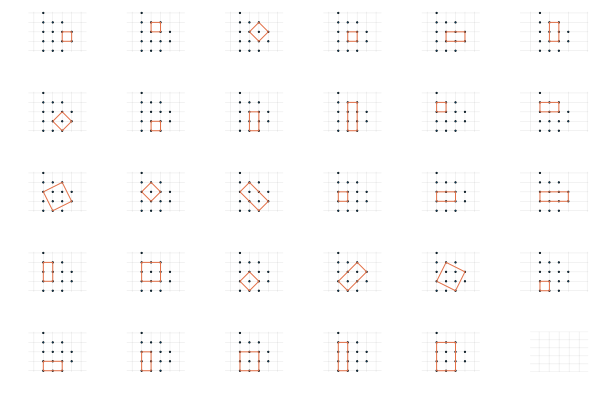

In [6]:
function plotrect(rect, plt)
    xs, ys = zip(rect[[1,2,4,3]]...)
    xs = [xs...; xs[1]]
    ys = [ys...; ys[1]]
    plot!(plt, xs, ys)
end

xs, ys = zip(points...)

plts = []
for i in eachindex(rects)
    push!(plts, plot(axis=false, legend=false, aspect_ratio=1))
    scatter!(plts[i], [xs...], [ys...], m=1)
    plotrect(rects[i], plts[i])
end
n_rows = 5
n_cols = Int(ceil(length(rects)/n_rows))
for i =1:n_rows*n_cols-length(rects)
    push!(plts, plot(axis=false, legend=false, aspect_ratio=1))
end
plot(plts..., layout=(n_rows, n_cols))